In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('google_cleaned.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [3]:
df.shape

(10840, 16)

In [4]:
df_copy=df.copy()

In [5]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  day             10840 non-null  int64  
 14  month           10840 non-null  int64  
 15  year            10840 non-null  int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 1.3+ MB


In [7]:
df_copy.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'day', 'month', 'year'],
      dtype='object')

In [8]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
day                  0
month                0
year                 0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9366.0,4.191757e+00,5.152189e-01,1.00,4.0,4.3,4.5,5.000000e+00
Reviews,10840.0,4.441529e+05,2.927761e+06,0.00,38.0,2094.0,54775.5,7.815831e+07
Size,9145.0,2.150653e+01,2.259602e+01,0.01,4.9,13.0,30.0,1.000000e+02
Installs,10840.0,1.546434e+07,8.502936e+07,0.00,1000.0,100000.0,5000000.0,1.000000e+09
Price,10840.0,1.027368e+00,1.594970e+01,0.00,0.0,0.0,0.0,4.000000e+02
day,10840.0,1.560904e+01,9.561621e+00,1.00,6.0,16.0,24.0,3.100000e+01
month,10840.0,6.422325e+00,2.578388e+00,1.00,5.0,7.0,8.0,1.200000e+01
year,10840.0,2.017400e+03,1.100914e+00,2010.00,2017.0,2018.0,2018.0,2.018000e+03


In [10]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
count,10840,10840,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10839,10840.000000,10840,10840,10840,10832,10838,10840.000000,10840.000000,10840.000000
unique,9659,33,NaN,NaN,NaN,NaN,2,NaN,6,119,1377,2831,33,NaN,NaN,NaN
top,ROBLOX,FAMILY,NaN,NaN,NaN,NaN,Free,NaN,Everyone,Tools,2018-08-03,Varies with device,4.1 and up,NaN,NaN,NaN
freq,9,1972,NaN,NaN,NaN,NaN,10039,NaN,8714,842,326,1459,2451,NaN,NaN,NaN
mean,NaN,NaN,4.191757,4.441529e+05,21.506534,1.546434e+07,NaN,1.027368,NaN,NaN,NaN,NaN,NaN,15.609041,6.422325,2017.399723
std,NaN,NaN,0.515219,2.927761e+06,22.596021,8.502936e+07,NaN,15.949703,NaN,NaN,NaN,NaN,NaN,9.561621,2.578388,1.100914
min,NaN,NaN,1.000000,0.000000e+00,0.010000,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,2010.000000
25%,NaN,NaN,4.000000,3.800000e+01,4.900000,1.000000e+03,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,2017.000000
50%,NaN,NaN,4.300000,2.094000e+03,13.000000,1.000000e+05,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,16.000000,7.000000,2018.000000
75%,NaN,NaN,4.500000,5.477550e+04,30.000000,5.000000e+06,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,24.000000,8.000000,2018.000000


In [11]:
df.duplicated().sum()

483

In [12]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,10000000,Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device,6,4,2018
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,1000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device,6,8,2018
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,NaN,100000000,Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device,27,6,2018
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86.0,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up,1,6,2018


In [13]:
df.drop_duplicates()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015


In [14]:
df.drop_duplicates().sum()

App               Photo Editor & Candy Camera & Grid & ScrapBook...
Category          ART_AND_DESIGNART_AND_DESIGNART_AND_DESIGNART_...
Rating                                                      37238.6
Reviews                                                  4203954052
Size                                                      187901.05
Installs                                               146631914527
Price                                                       10676.0
Content Rating    EveryoneEveryoneEveryoneTeenEveryoneEveryoneEv...
Genres            Art & DesignArt & Design;Pretend PlayArt & Des...
Last Updated      2018-01-072018-01-152018-08-012018-06-082018-0...
day                                                          161767
month                                                         66254
year                                                       20894035
dtype: object

In [15]:
df.shape

(10840, 16)

In [16]:
display(df.drop_duplicates())

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015


In [17]:
df.drop_duplicates(keep=False, inplace=True)

In [18]:
df.shape

(9947, 16)

In [19]:
numerical_feature=[feature for feature in df.columns if (df[feature]).dtype != "O"]
numerical_feature

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'day', 'month', 'year']

In [20]:
categorial_feature = [feature for feature in df.columns if (df[feature]).dtype =="O"]
categorial_feature

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [21]:
df["App"].value_counts()

ROBLOX                                           9
8 Ball Pool                                      7
Zombie Catchers                                  6
Bubble Shooter                                   6
Helix Jump                                       6
                                                ..
Vienna U-Bahn                                    1
U-Haul                                           1
Kicker U                                         1
/u/app                                           1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9381, dtype: int64

In [22]:
len(df['App'].value_counts())

9381

In [23]:
df['App'].value_counts(normalize=True)

ROBLOX                                           0.000905
8 Ball Pool                                      0.000704
Zombie Catchers                                  0.000603
Bubble Shooter                                   0.000603
Helix Jump                                       0.000603
                                                   ...   
Vienna U-Bahn                                    0.000101
U-Haul                                           0.000101
Kicker U                                         0.000101
/u/app                                           0.000101
iHoroscope - 2018 Daily Horoscope & Astrology    0.000101
Name: App, Length: 9381, dtype: float64

In [24]:
df["App"].value_counts(normalize=False)

ROBLOX                                           9
8 Ball Pool                                      7
Zombie Catchers                                  6
Bubble Shooter                                   6
Helix Jump                                       6
                                                ..
Vienna U-Bahn                                    1
U-Haul                                           1
Kicker U                                         1
/u/app                                           1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9381, dtype: int64

In [25]:
df["App"].value_counts(normalize=True)*100

ROBLOX                                           0.090480
8 Ball Pool                                      0.070373
Zombie Catchers                                  0.060320
Bubble Shooter                                   0.060320
Helix Jump                                       0.060320
                                                   ...   
Vienna U-Bahn                                    0.010053
U-Haul                                           0.010053
Kicker U                                         0.010053
/u/app                                           0.010053
iHoroscope - 2018 Daily Horoscope & Astrology    0.010053
Name: App, Length: 9381, dtype: float64

In [26]:
df[categorial_feature]


,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,2017-07-25,1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,2018-07-06,1.0,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,2017-01-20,1.0,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [27]:
df[numerical_feature]

,Rating,Reviews,Size,Installs,Price,day,month,year
0,4.1,159,19.0,10000,0.0,7,1,2018
1,3.9,967,14.0,500000,0.0,15,1,2018
2,4.7,87510,8.7,5000000,0.0,1,8,2018
3,4.5,215644,25.0,50000000,0.0,8,6,2018
4,4.3,967,2.8,100000,0.0,20,6,2018
...,...,...,...,...,...,...,...,...
10835,4.5,38,53.0,5000,0.0,25,7,2017
10836,5.0,4,3.6,100,0.0,6,7,2018
10837,NaN,3,9.5,1000,0.0,20,1,2017
10838,4.5,114,NaN,1000,0.0,19,1,2015


In [28]:
num_df=df[numerical_feature]
cat_df=df[categorial_feature]

In [29]:
num_df

,Rating,Reviews,Size,Installs,Price,day,month,year
0,4.1,159,19.0,10000,0.0,7,1,2018
1,3.9,967,14.0,500000,0.0,15,1,2018
2,4.7,87510,8.7,5000000,0.0,1,8,2018
3,4.5,215644,25.0,50000000,0.0,8,6,2018
4,4.3,967,2.8,100000,0.0,20,6,2018
...,...,...,...,...,...,...,...,...
10835,4.5,38,53.0,5000,0.0,25,7,2017
10836,5.0,4,3.6,100,0.0,6,7,2018
10837,NaN,3,9.5,1000,0.0,20,1,2017
10838,4.5,114,NaN,1000,0.0,19,1,2015


<Axes: xlabel='Rating', ylabel='Density'>

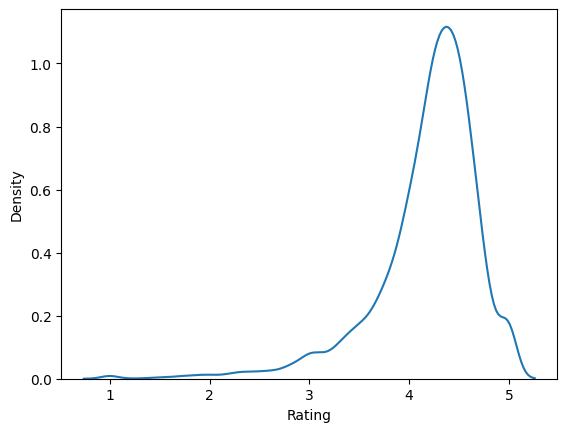

In [30]:
sns.kdeplot(num_df['Rating'])

<Axes: xlabel='Reviews', ylabel='Density'>

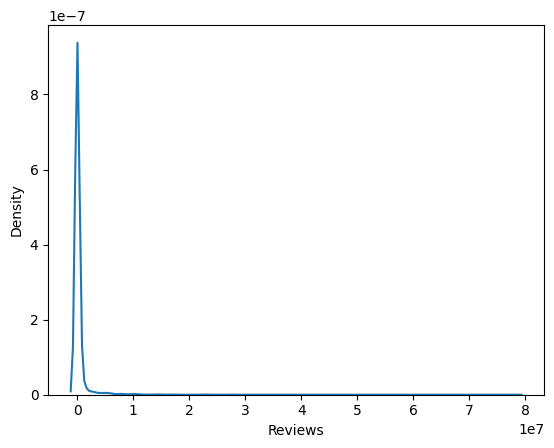

In [31]:
sns.kdeplot(df["Reviews"])

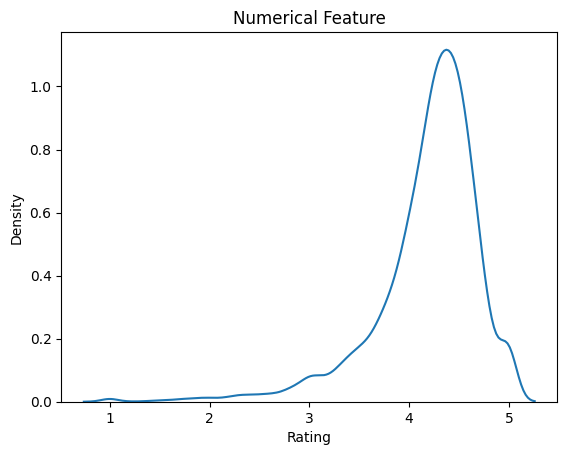

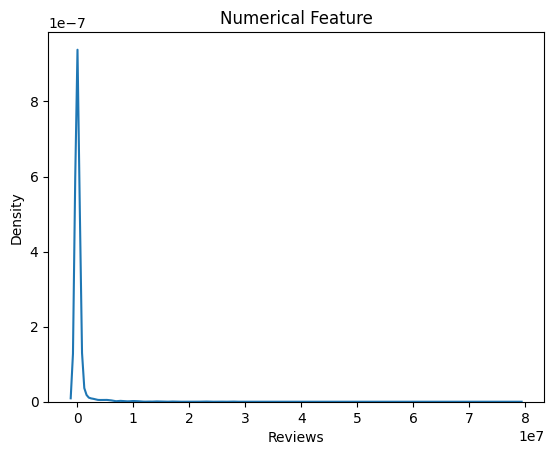

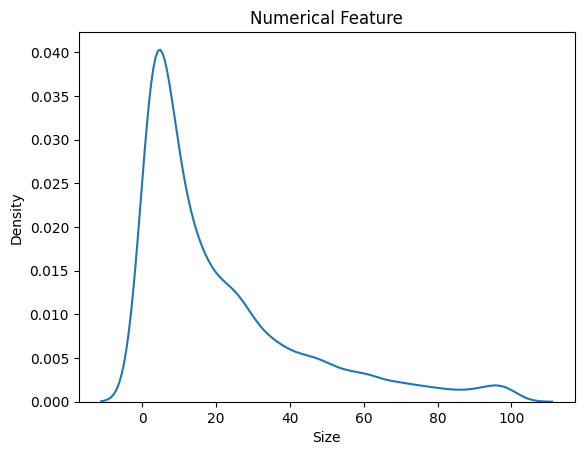

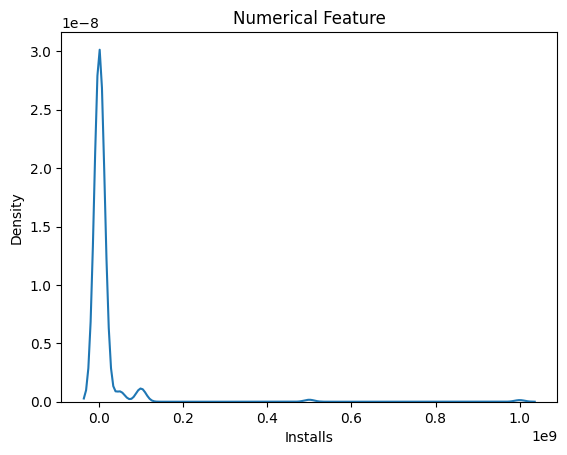

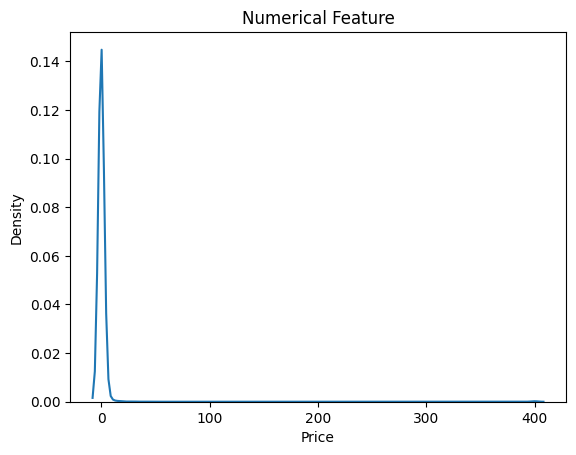

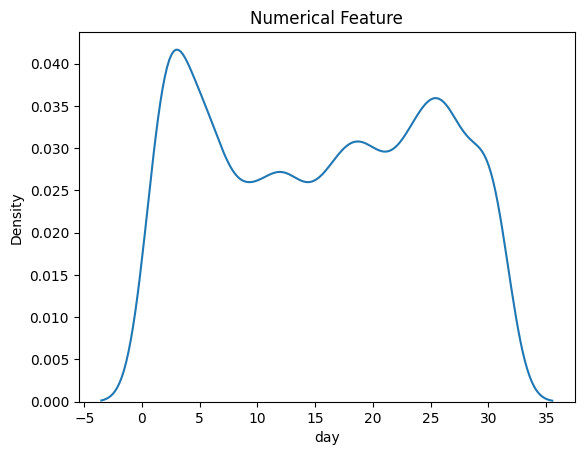

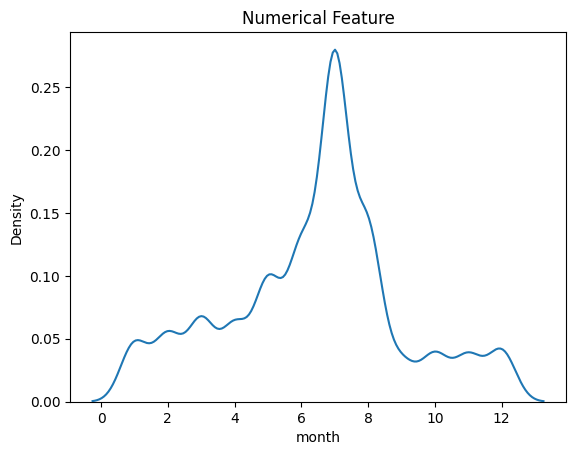

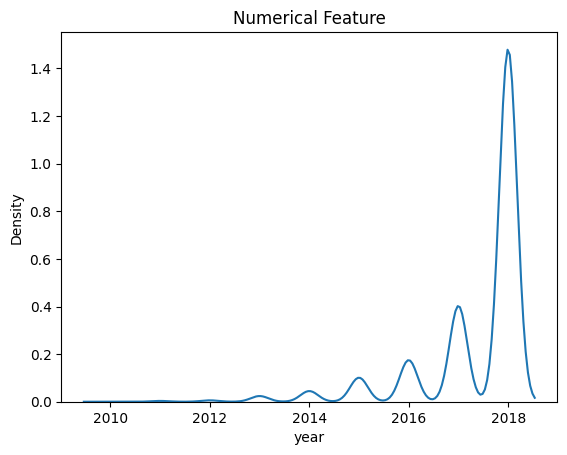

In [32]:
for i in numerical_feature:

  sns.kdeplot(num_df[i])
  plt.xlabel(i)
  plt.title("Numerical Feature")
  plt.show()


In [33]:
len(numerical_feature)

8

In [34]:
(numerical_feature)

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'day', 'month', 'year']

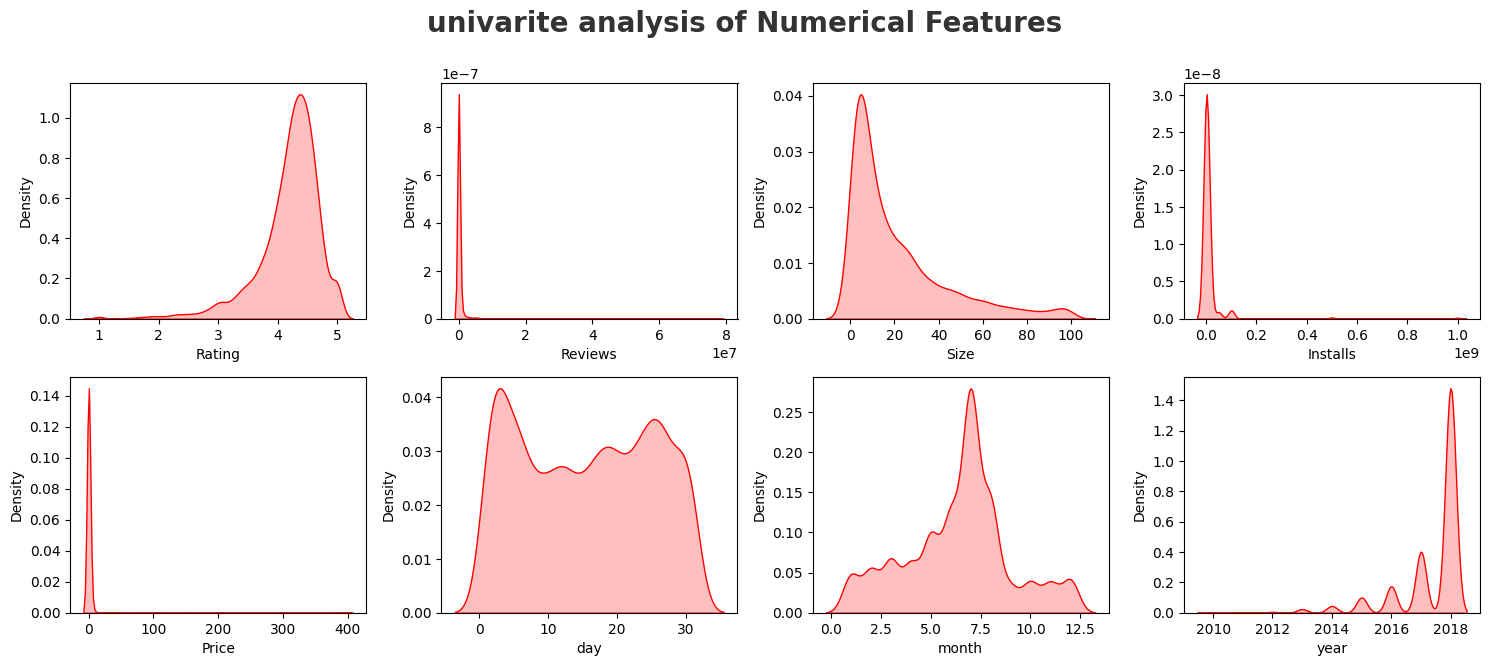

In [35]:
plt.figure(figsize=(15,15))
plt.suptitle("univarite analysis of Numerical Features",fontsize=20,fontweight="bold",alpha=0.8,y=1.0)
for i in range (len(numerical_feature)):
  plt.subplot(5,4,i+1)
  sns.kdeplot(x=df[numerical_feature[i]],shade=True , color="r")
  plt.xlabel(numerical_feature[i])
  plt.tight_layout()

In [36]:
categorial_feature

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [37]:
len(categorial_feature)

8

In [38]:
cat_df

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,2017-07-25,1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,2018-07-06,1.0,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,2017-01-20,1.0,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [39]:
cat_df["Type"].value_counts()

Free    9215
Paid     731
Name: Type, dtype: int64

In [40]:
cat_df["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

In [41]:
cat_df["Content Rating"].value_counts()

Everyone           8094
Teen               1099
Mature 17+          398
Everyone 10+        351
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [42]:
cat_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

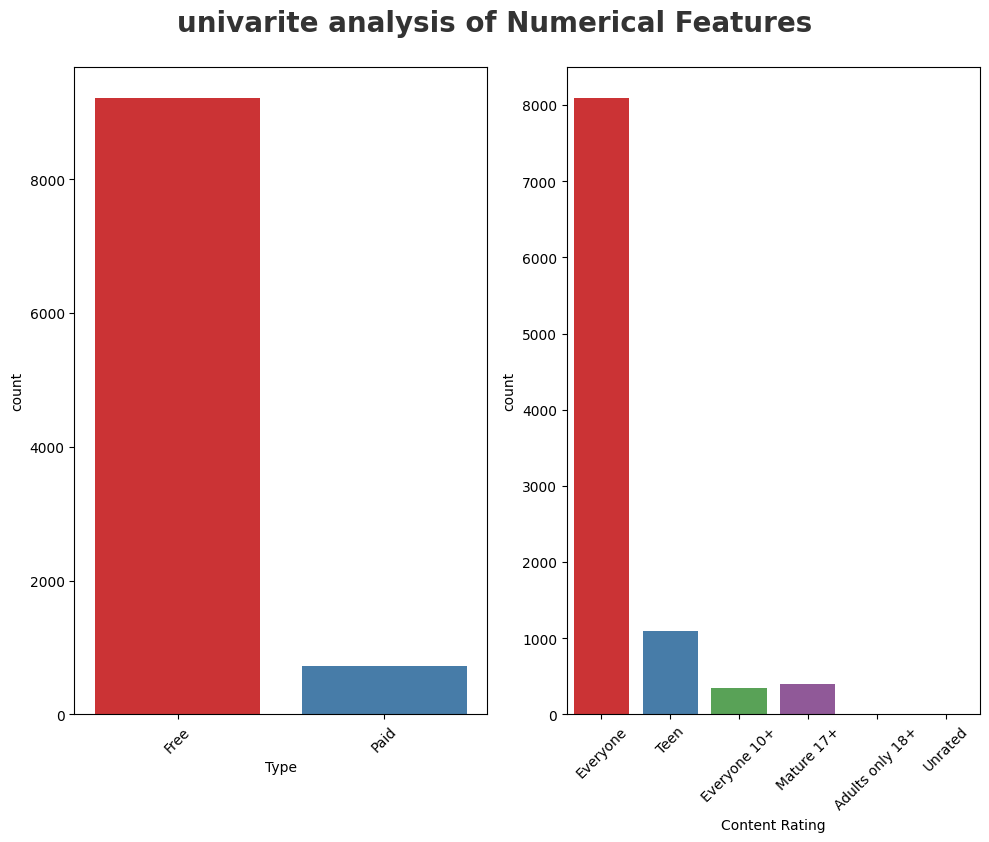

In [43]:
from pandas.core.indexes import category
plt.figure(figsize=(10,15))
plt.suptitle("univarite analysis of Numerical Features", fontsize=20,fontweight="bold",alpha=0.8,y=1.0)
category=["Type","Content Rating"]

for i in range(0,len(category)):
  plt.subplot(2,2, i+1)
  sns.countplot(x= df[category[i]], palette="Set1")
  plt.xlabel(category[i])
  plt.xticks(rotation= 45)
  plt.tight_layout()

In [44]:
cat_df["Genres"].unique()
cat_df["Genres"].value_counts()

Tools                          842
Entertainment                  563
Education                      510
Business                       398
Productivity                   392
                              ... 
Health & Fitness;Education       1
Music & Audio;Music & Video      1
Arcade;Pretend Play              1
Entertainment;Education          1
Strategy;Creativity              1
Name: Genres, Length: 118, dtype: int64

<Axes: ylabel='Category'>

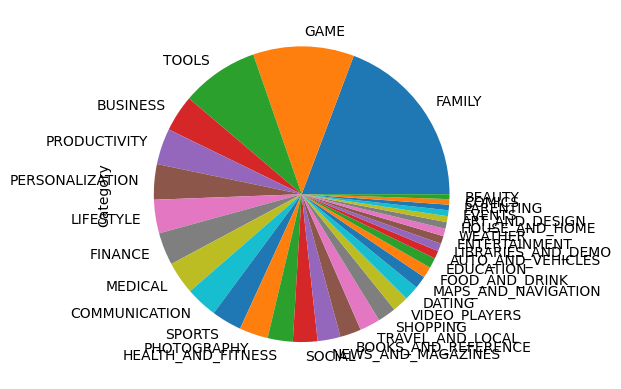

In [46]:
cat_df["Category"].value_counts().plot.pie()

Text(0.5, 0.5, 'Pie chart')

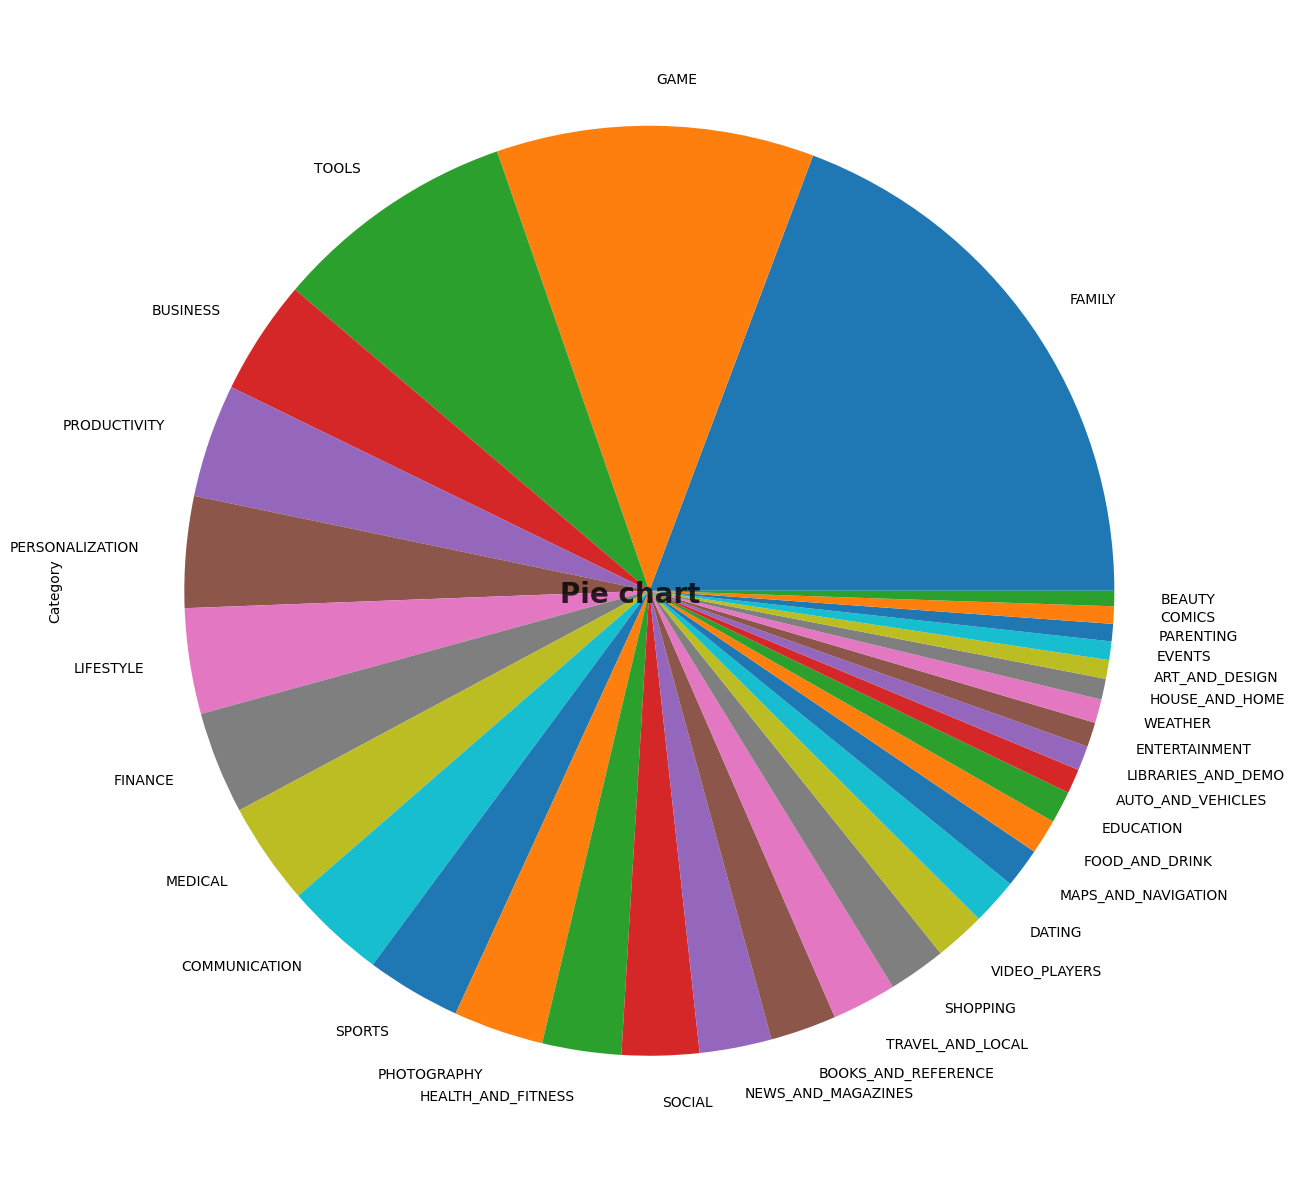

In [47]:
cat_df["Category"].value_counts().plot.pie(figsize=(15,20))
plt.suptitle("Pie chart", fontsize= 20,fontweight= "bold",alpha=0.8,y=0.5)

<Axes: ylabel='Category'>

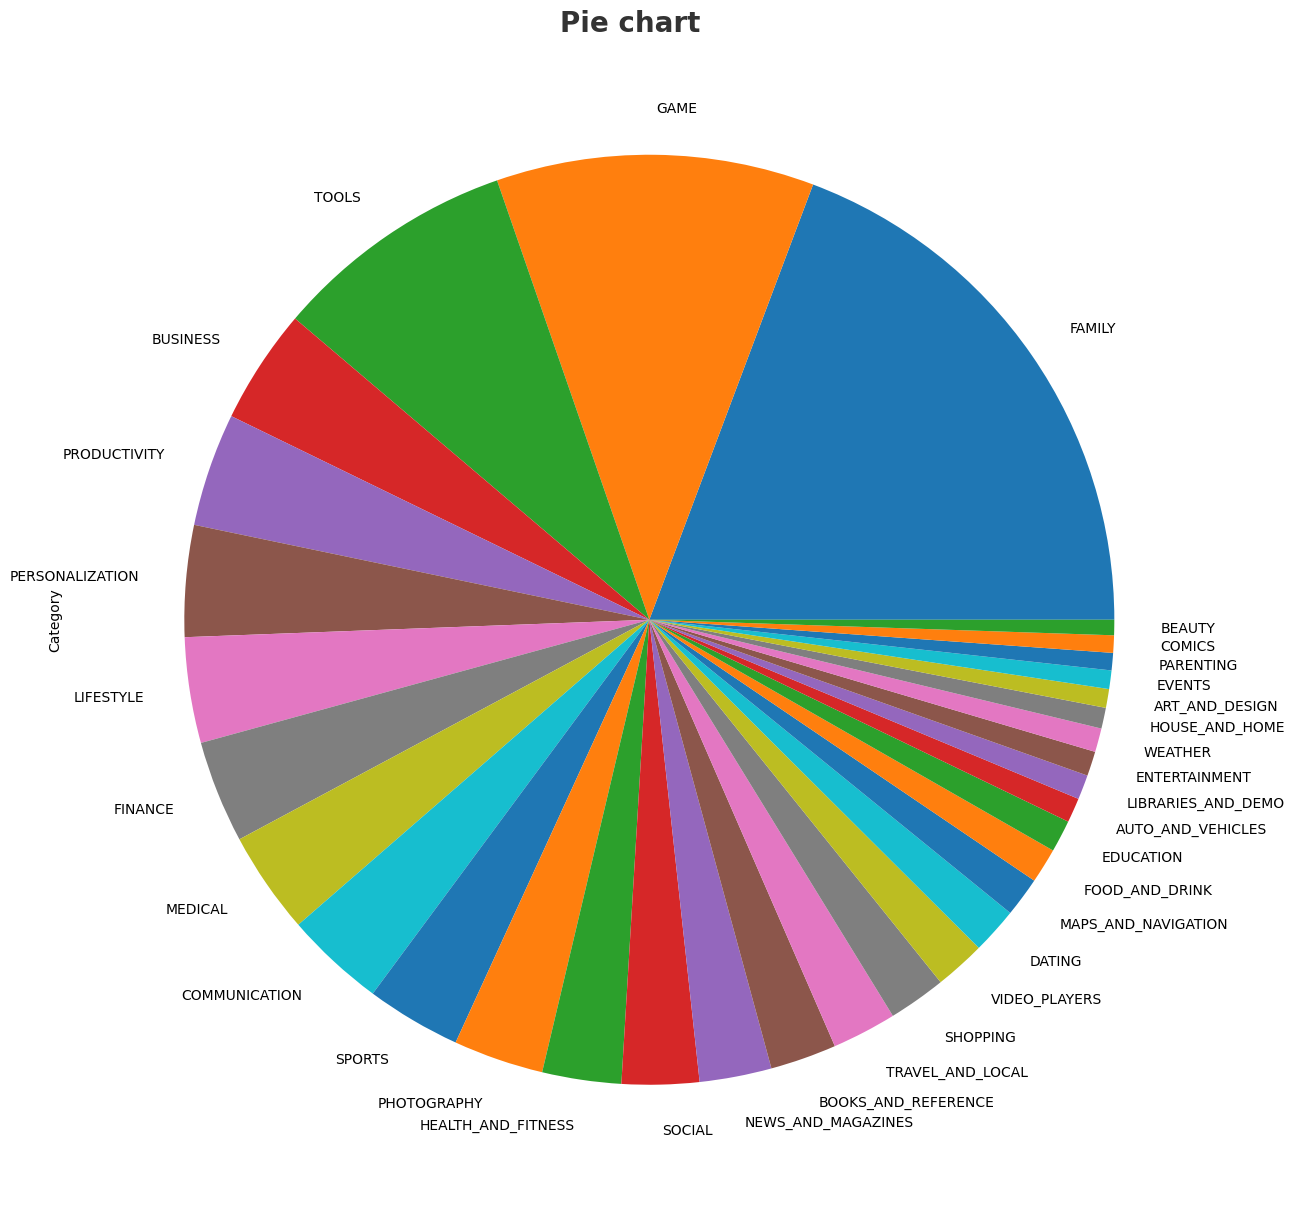

In [48]:
plt.suptitle("Pie chart", fontsize= 20,fontweight= "bold",alpha=0.8,y=0.8)
cat_df["Category"].value_counts().plot.pie(figsize=(15,20))

<Axes: ylabel='Category'>

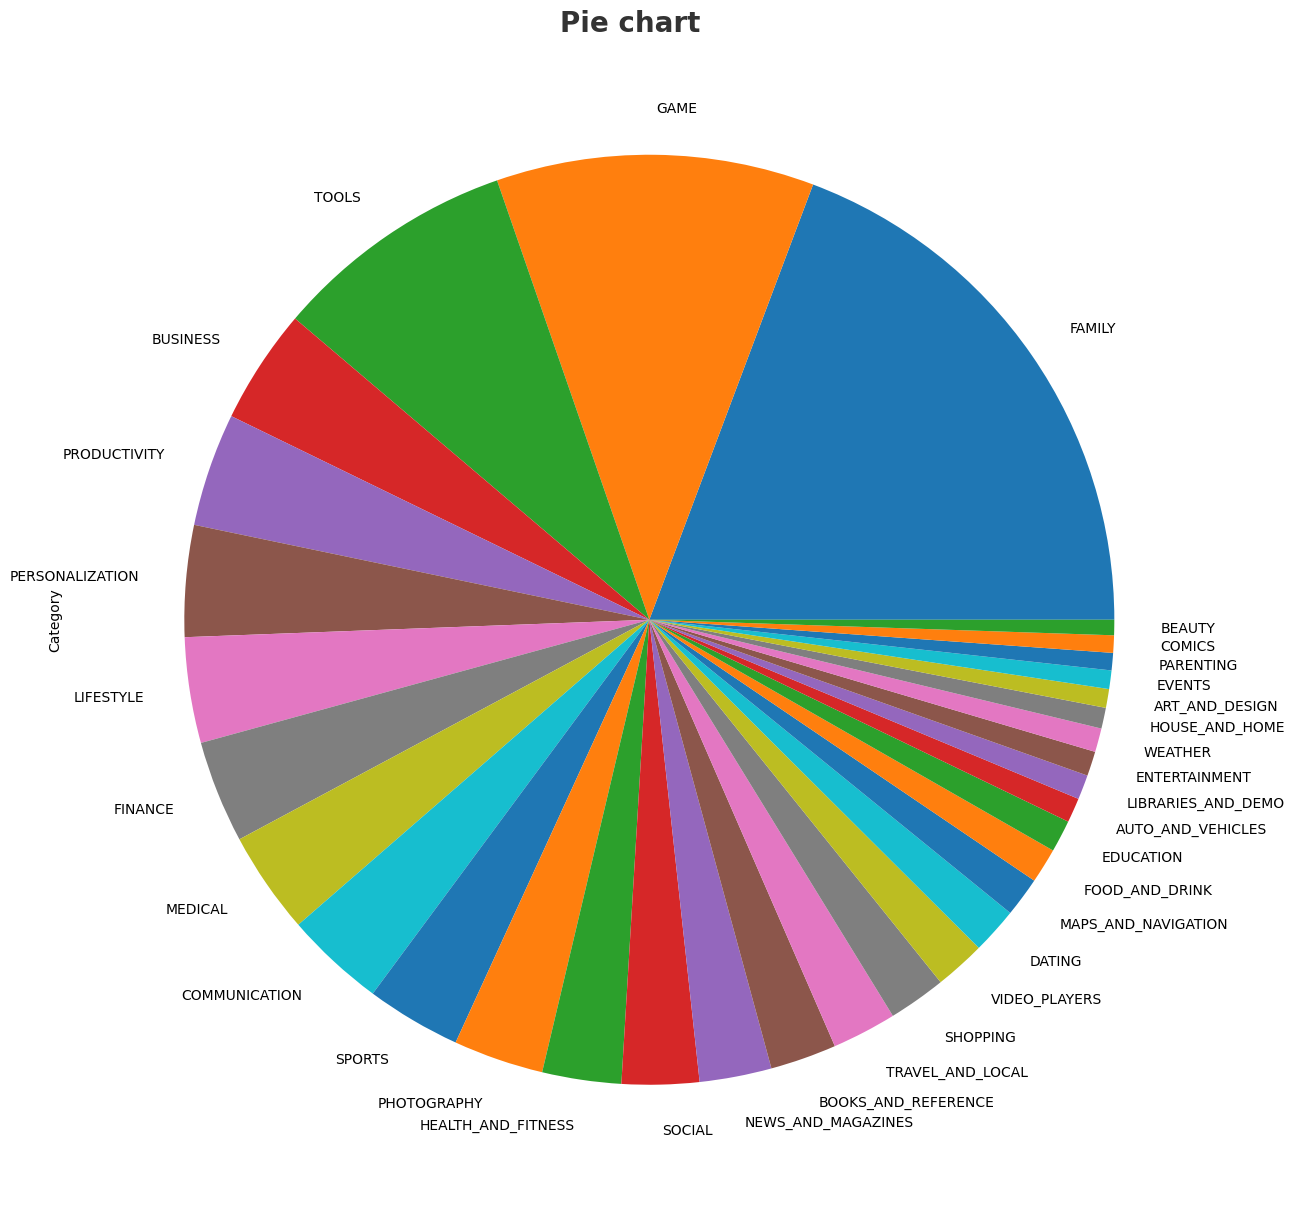

In [49]:
plt.suptitle("Pie chart", fontsize= 20,fontweight= "bold",alpha=0.8,y=0.8)
cat_df["Category"].value_counts().plot.pie(figsize=(15,20))

<Axes: ylabel='Category'>

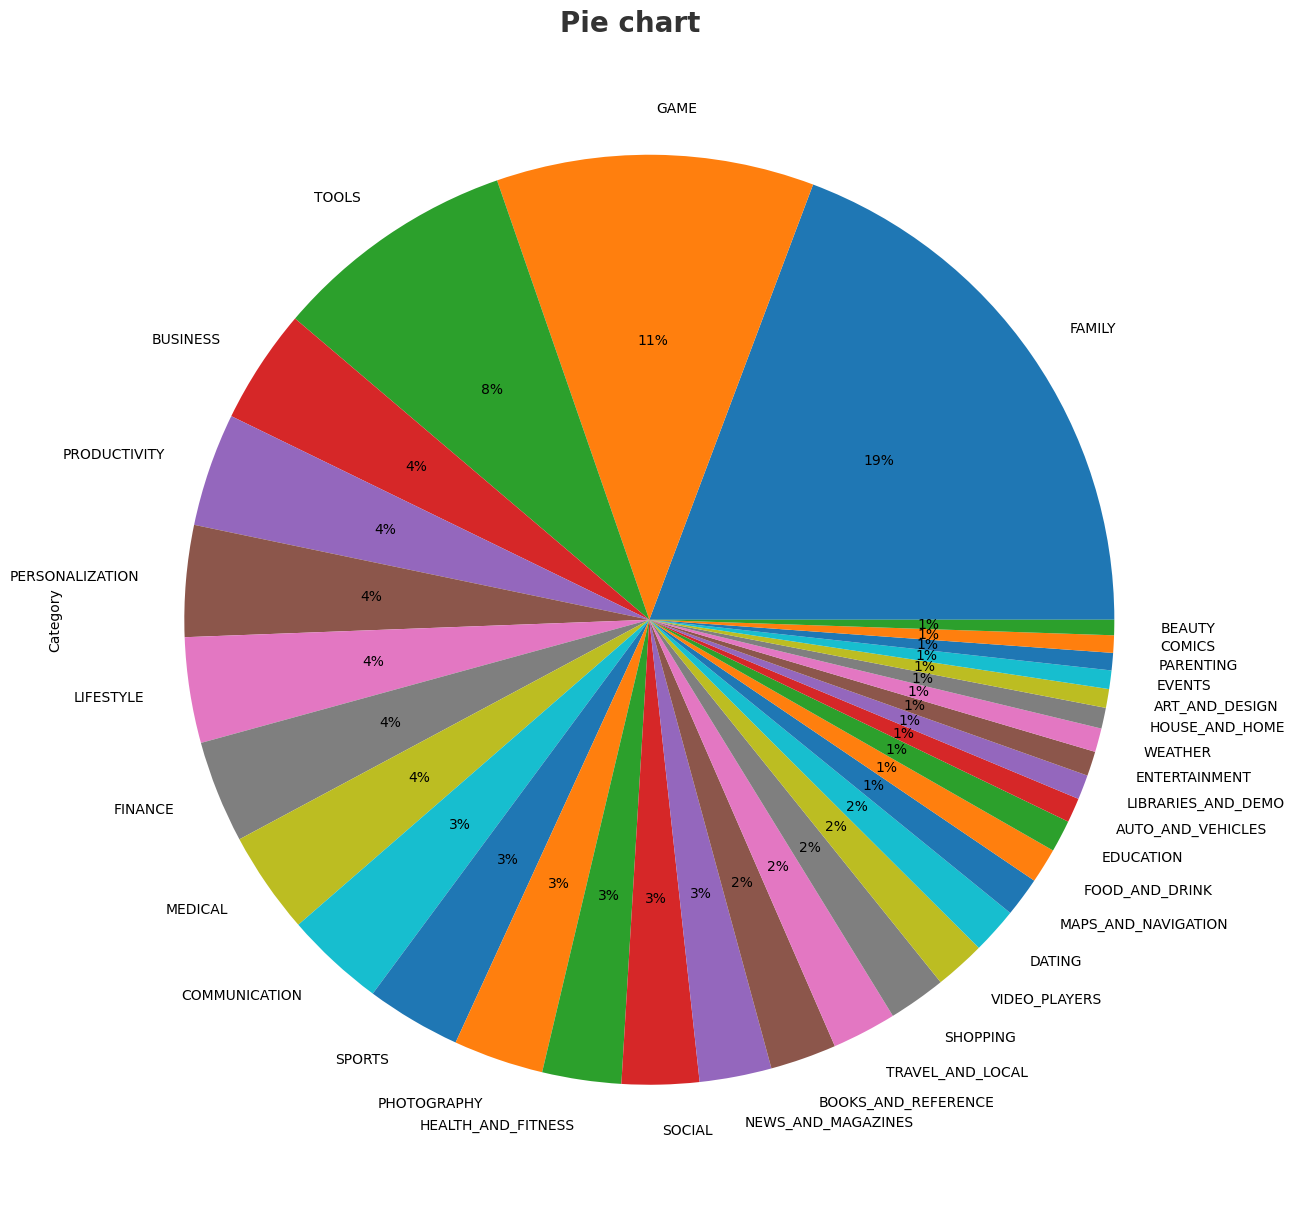

In [50]:
plt.suptitle("Pie chart", fontsize= 20,fontweight= "bold",alpha=0.8,y=0.8)
cat_df["Category"].value_counts().plot.pie(figsize=(15,20),autopct='%.0f%%')


In [51]:
cat_df["Category"].value_counts()

FAMILY                 1917
GAME                   1098
TOOLS                   843
BUSINESS                398
PRODUCTIVITY            392
PERSONALIZATION         385
LIFESTYLE               365
FINANCE                 354
MEDICAL                 354
COMMUNICATION           346
SPORTS                  328
PHOTOGRAPHY             312
HEALTH_AND_FITNESS      273
SOCIAL                  267
NEWS_AND_MAGAZINES      249
BOOKS_AND_REFERENCE     229
TRAVEL_AND_LOCAL        223
SHOPPING                199
VIDEO_PLAYERS           175
DATING                  160
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          121
EDUCATION               111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
ENTERTAINMENT            85
WEATHER                  82
HOUSE_AND_HOME           72
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [52]:
pd.DataFrame(cat_df["Category"].value_counts())

,Category
FAMILY,1917
GAME,1098
TOOLS,843
BUSINESS,398
PRODUCTIVITY,392
PERSONALIZATION,385
LIFESTYLE,365
FINANCE,354
MEDICAL,354
COMMUNICATION,346


In [53]:
category=pd.DataFrame(cat_df["Category"].value_counts())

In [54]:
category.head(10)

,Category
FAMILY,1917
GAME,1098
TOOLS,843
BUSINESS,398
PRODUCTIVITY,392
PERSONALIZATION,385
LIFESTYLE,365
FINANCE,354
MEDICAL,354
COMMUNICATION,346


In [55]:
category.rename(columns={"Category":"counts"},inplace= True)
category

,counts
FAMILY,1917
GAME,1098
TOOLS,843
BUSINESS,398
PRODUCTIVITY,392
PERSONALIZATION,385
LIFESTYLE,365
FINANCE,354
MEDICAL,354
COMMUNICATION,346


<Axes: ylabel='counts'>

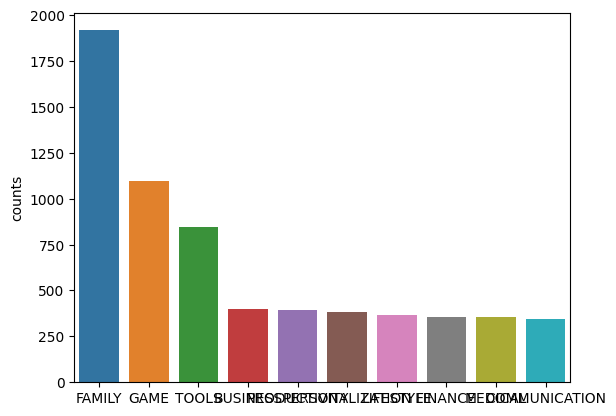

In [56]:
sns.barplot(x= category.index[:10],y= "counts",data=category[:10])

<Axes: ylabel='counts'>

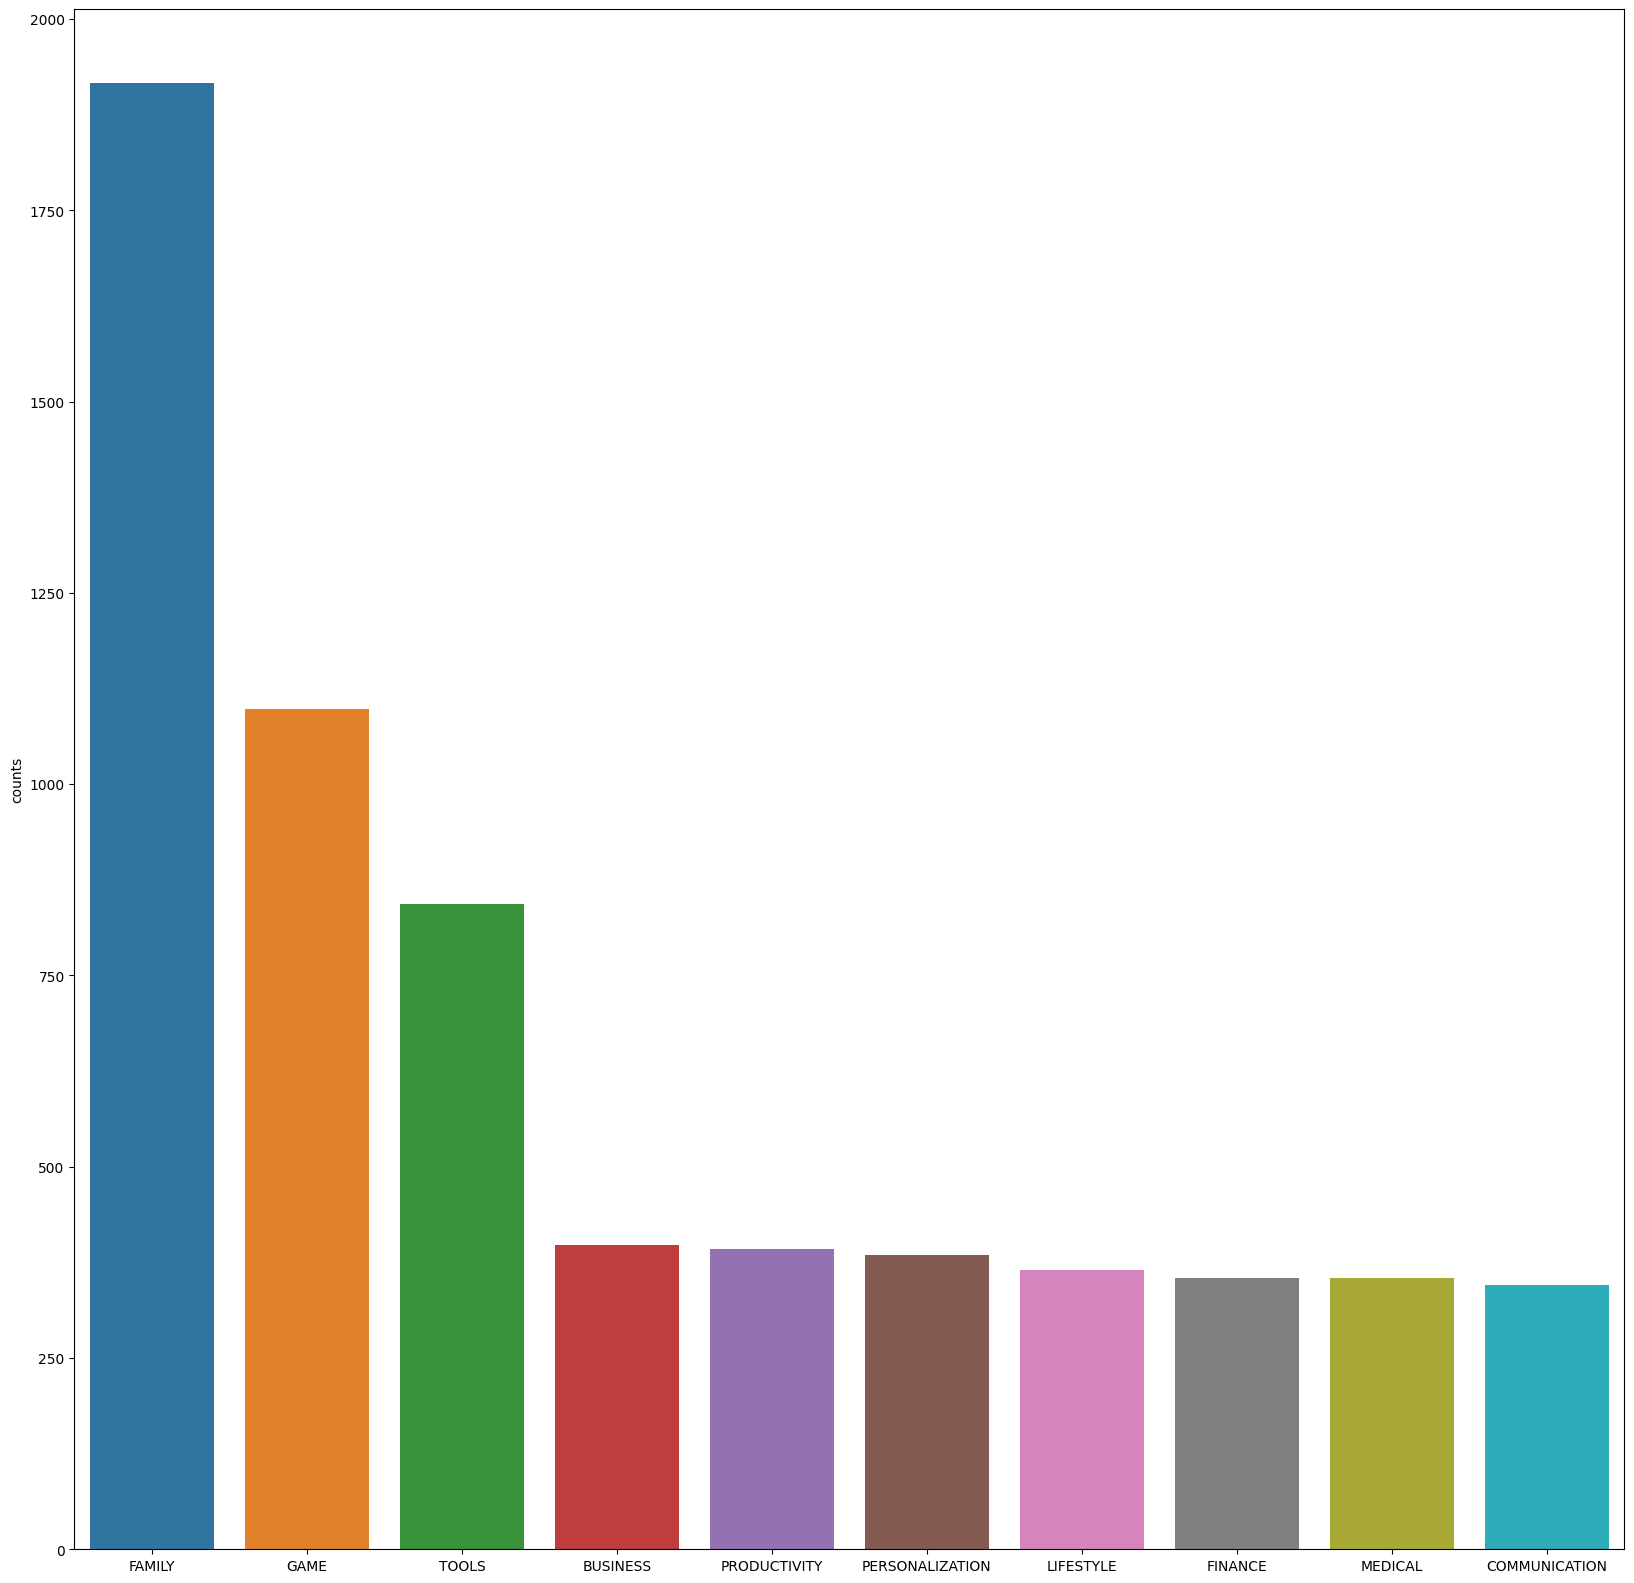

In [57]:
plt.figure(figsize=(20,20))
sns.barplot(x= category.index[:10],y= "counts",data=category[:10])

In [58]:
cat_df.head(10)

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,Free,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up


In [59]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [60]:
num_df.head()

,Rating,Reviews,Size,Installs,Price,day,month,year
0,4.1,159,19.0,10000,0.0,7,1,2018
1,3.9,967,14.0,500000,0.0,15,1,2018
2,4.7,87510,8.7,5000000,0.0,1,8,2018
3,4.5,215644,25.0,50000000,0.0,8,6,2018
4,4.3,967,2.8,100000,0.0,20,6,2018


In [61]:
df.groupby(["Category"])["Installs"].sum()

Category
ART_AND_DESIGN           124338100
AUTO_AND_VEHICLES         53130211
BEAUTY                    27197050
BOOKS_AND_REFERENCE     1911469576
BUSINESS                 742414865
COMICS                    56086150
COMMUNICATION          16657276251
DATING                   148776407
EDUCATION                337452000
ENTERTAINMENT           2116160000
EVENTS                    15973161
FAMILY                  9827221505
FINANCE                  664048734
FOOD_AND_DRINK           241898751
GAME                   28002024415
HEALTH_AND_FITNESS      1153972512
HOUSE_AND_HOME            81712461
LIBRARIES_AND_DEMO        62995910
LIFESTYLE                532103539
MAPS_AND_NAVIGATION      724281890
MEDICAL                   31155917
NEWS_AND_MAGAZINES      3325117760
PARENTING                 31521110
PERSONALIZATION         1923494782
PHOTOGRAPHY             9370247655
PRODUCTIVITY           10950091369
SHOPPING                2191348785
SOCIAL                 11107867902
SPORTS     

In [62]:
df.groupby(["Category"])["Installs"].sum().sort_values()

Category
EVENTS                    15973161
BEAUTY                    27197050
MEDICAL                   31155917
PARENTING                 31521110
AUTO_AND_VEHICLES         53130211
COMICS                    56086150
LIBRARIES_AND_DEMO        62995910
HOUSE_AND_HOME            81712461
ART_AND_DESIGN           124338100
DATING                   148776407
FOOD_AND_DRINK           241898751
EDUCATION                337452000
WEATHER                  426100520
LIFESTYLE                532103539
FINANCE                  664048734
MAPS_AND_NAVIGATION      724281890
BUSINESS                 742414865
HEALTH_AND_FITNESS      1153972512
SPORTS                  1376974498
BOOKS_AND_REFERENCE     1911469576
PERSONALIZATION         1923494782
ENTERTAINMENT           2116160000
SHOPPING                2191348785
NEWS_AND_MAGAZINES      3325117760
TRAVEL_AND_LOCAL        6049887146
VIDEO_PLAYERS           6222002720
PHOTOGRAPHY             9370247655
FAMILY                  9827221505
PRODUCTIVIT

In [63]:
df.groupby(["Category"])["Installs"].sum().sort_values(ascending= False)

Category
GAME                   28002024415
COMMUNICATION          16657276251
TOOLS                  11452771915
SOCIAL                 11107867902
PRODUCTIVITY           10950091369
FAMILY                  9827221505
PHOTOGRAPHY             9370247655
VIDEO_PLAYERS           6222002720
TRAVEL_AND_LOCAL        6049887146
NEWS_AND_MAGAZINES      3325117760
SHOPPING                2191348785
ENTERTAINMENT           2116160000
PERSONALIZATION         1923494782
BOOKS_AND_REFERENCE     1911469576
SPORTS                  1376974498
HEALTH_AND_FITNESS      1153972512
BUSINESS                 742414865
MAPS_AND_NAVIGATION      724281890
FINANCE                  664048734
LIFESTYLE                532103539
WEATHER                  426100520
EDUCATION                337452000
FOOD_AND_DRINK           241898751
DATING                   148776407
ART_AND_DESIGN           124338100
HOUSE_AND_HOME            81712461
LIBRARIES_AND_DEMO        62995910
COMICS                    56086150
AUTO_AND_VE

In [64]:
df.groupby(["Category"])["Installs"].sum().nlargest(10)

Category
GAME                  28002024415
COMMUNICATION         16657276251
TOOLS                 11452771915
SOCIAL                11107867902
PRODUCTIVITY          10950091369
FAMILY                 9827221505
PHOTOGRAPHY            9370247655
VIDEO_PLAYERS          6222002720
TRAVEL_AND_LOCAL       6049887146
NEWS_AND_MAGAZINES     3325117760
Name: Installs, dtype: int64

<Axes: ylabel='Installs'>

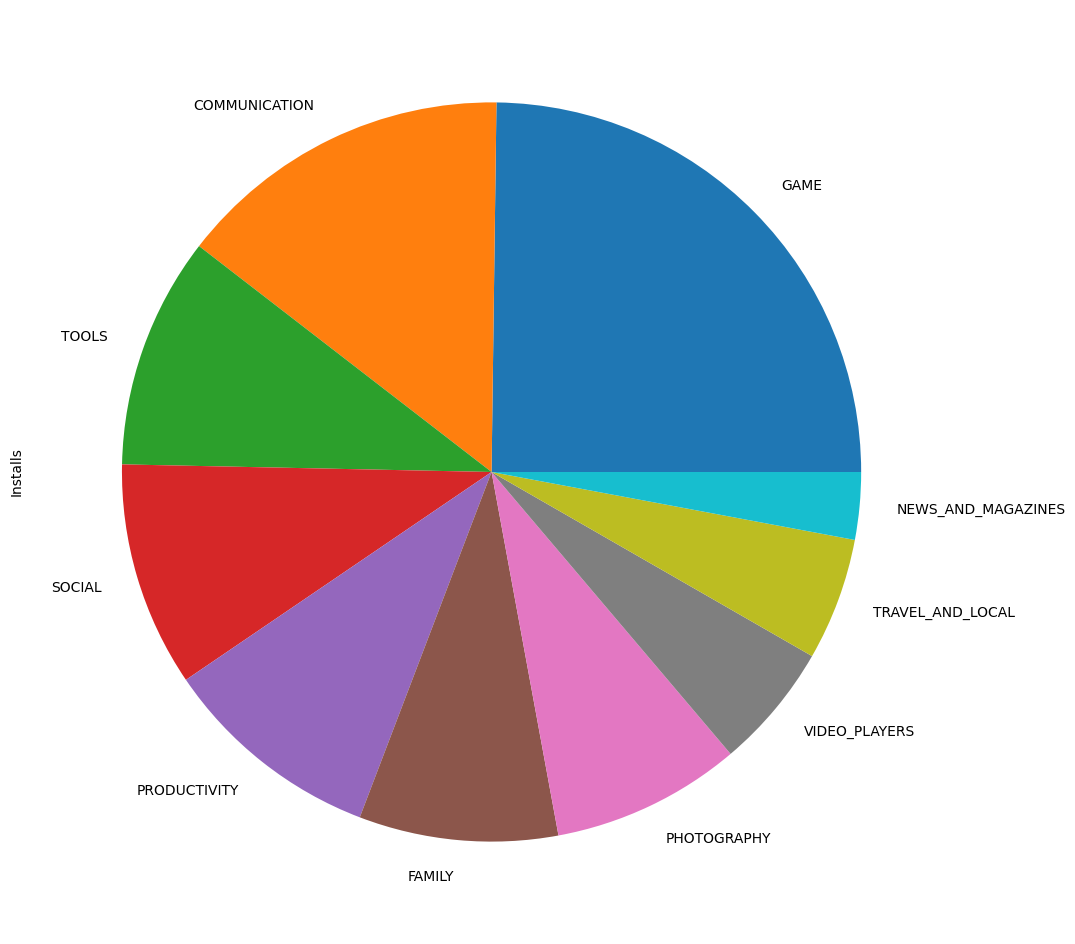

In [65]:
df.groupby(["Category"])["Installs"].sum().nlargest(10).plot.pie(figsize= (12,12))

<Axes: xlabel='Category'>

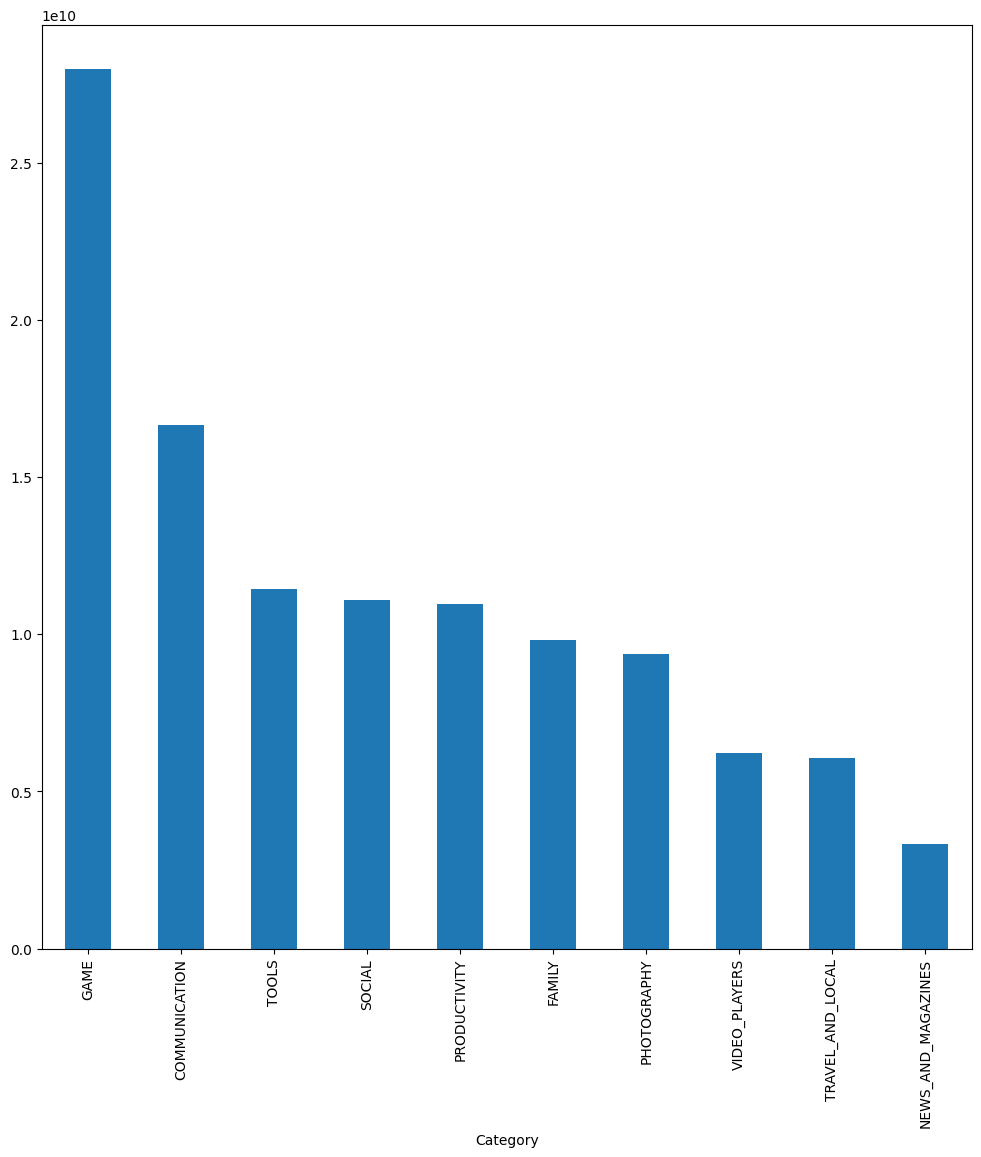

In [66]:
df.groupby(["Category"])["Installs"].sum().nlargest(10).plot.bar(figsize= (12,12))

In [67]:
#1.how many apps are there on google play store which get 5 ratings?
df[df["Rating"]==5]  # get the data which has rating 5
df[df["Rating"]==5]["App"] # there are 268 app's whoes rating are 5
df[df["Rating"]==5]["App"].count()
a=df[df["Rating"]==5]["App"].count()
print("Total Apps on google play store which get 5 ratings are:",a)

Total Apps on google play store which get 5 ratings are: 268


<Axes: xlabel='Rating'>

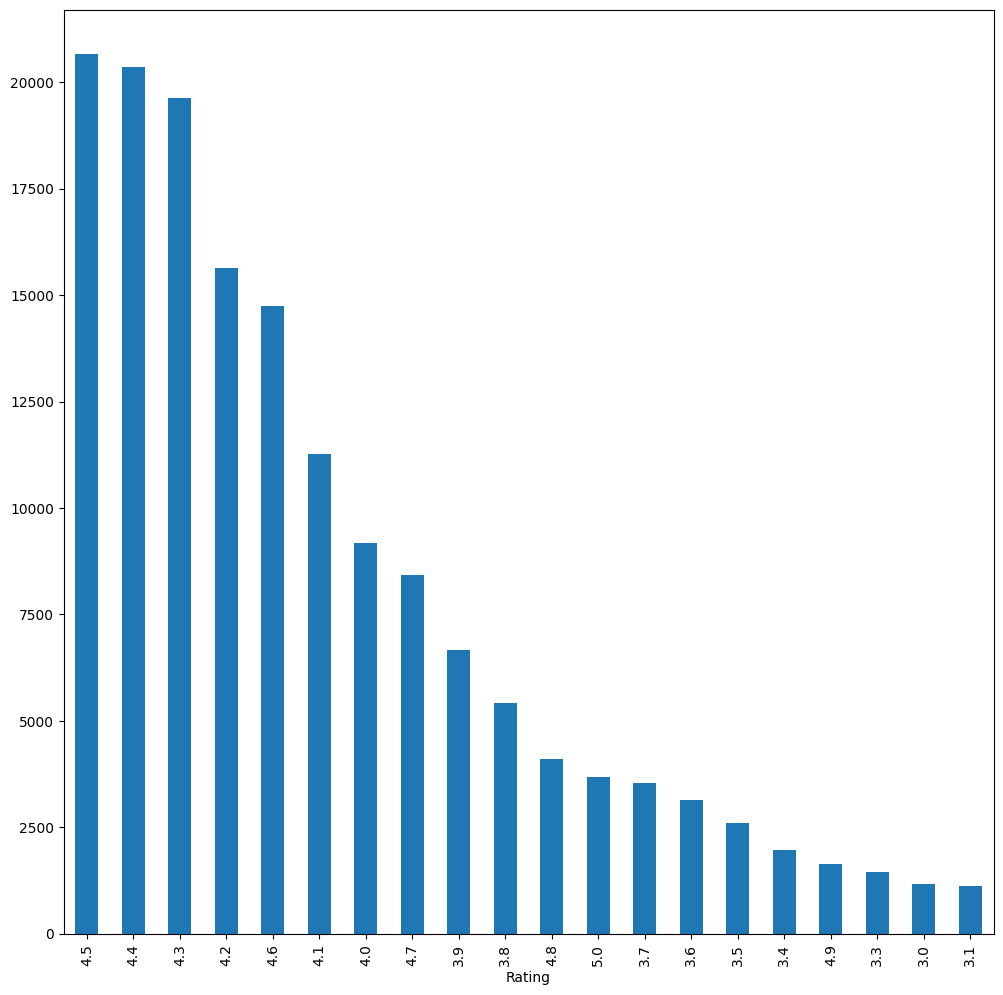

In [68]:
df.groupby(["Rating"])["Size"].sum().sort_values(ascending= False)
df.groupby(["Rating"])["Size"].sum().sort_values(ascending= False).nlargest(20).plot.bar(figsize= (12,12))

In [69]:
df.groupby(["Rating"])["Size"].sum().sort_values(ascending= False)

Rating
4.5    20669.600
4.4    20368.257
4.3    19631.216
4.2    15631.192
4.6    14742.759
4.1    11274.782
4.0     9188.437
4.7     8423.204
3.9     6659.470
3.8     5415.697
4.8     4110.963
5.0     3690.552
3.7     3544.874
3.6     3142.002
3.5     2595.239
3.4     1974.876
4.9     1630.434
3.3     1453.582
3.0     1171.716
3.1     1124.628
3.2      794.176
2.8      675.672
2.9      662.695
2.3      344.600
2.5      340.862
2.7      335.270
2.4      275.809
1.0      228.800
2.6      218.836
2.2      217.400
2.0      191.400
2.1      164.200
1.9      154.200
1.7       80.300
1.6       64.600
1.5       54.000
1.8       49.087
1.2       27.000
1.4       20.200
Name: Size, dtype: float64

In [70]:
df.groupby(["App","Category"])["Installs"].sum().sort_values(ascending= False).head(5)

App                           Category        
Hangouts                      COMMUNICATION       4000000000
Subway Surfers                GAME                4000000000
Google Photos                 PHOTOGRAPHY         4000000000
Maps - Navigate & Explore     TRAVEL_AND_LOCAL    3000000000
Google Chrome: Fast & Secure  COMMUNICATION       3000000000
Name: Installs, dtype: int64

In [71]:
df.groupby(["Category"])["Reviews"].sum().sort_values(ascending= False)

Category
GAME                   1245650951
SOCIAL                  450953900
COMMUNICATION           397569013
FAMILY                  383338162
TOOLS                   273185044
PHOTOGRAPHY             195466914
VIDEO_PLAYERS           110380188
PRODUCTIVITY             92374969
SHOPPING                 82317633
PERSONALIZATION          67506827
SPORTS                   61996740
TRAVEL_AND_LOCAL         51260122
ENTERTAINMENT            37854634
MAPS_AND_NAVIGATION      30659254
HEALTH_AND_FITNESS       23936793
NEWS_AND_MAGAZINES       22979922
BOOKS_AND_REFERENCE      21787385
FINANCE                  16449054
WEATHER                  14604735
EDUCATION                13988229
LIFESTYLE                12760163
BUSINESS                 11022817
FOOD_AND_DRINK            6459822
DATING                    3799655
COMICS                    3383276
ART_AND_DESIGN            1714440
HOUSE_AND_HOME            1613159
MEDICAL                   1207546
AUTO_AND_VEHICLES         1163666
LIBRA

<Axes: xlabel='Category'>

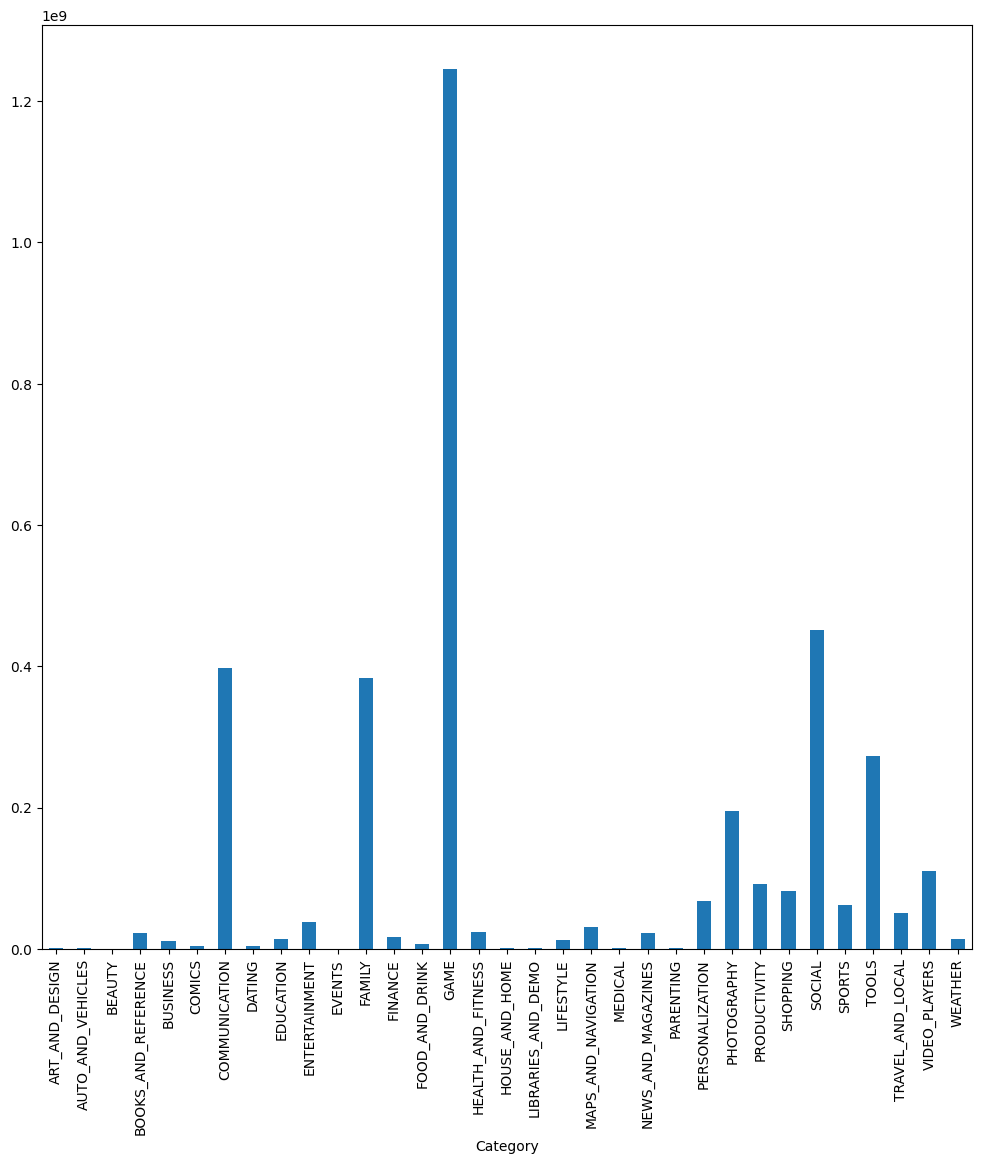

In [72]:
df.groupby(["Category"])["Reviews"].sum().plot.bar(figsize= (12,12))

In [73]:
#5.which kind of app user are downloading the most free/paid?
# check the different categories in "Type" Feature
cat_df["Type"].value_counts()
#df.groupby(["Type","App"])["Installs"].sum().sort_values(ascending= False)
df.groupby(["Type","App"])["Installs"].value_counts().sort_values(ascending= False)
# Ans : below are the details of free an paid user app's with downloading detals

Type  App                            Installs 
Free  ROBLOX                         100000000    9
      8 Ball Pool                    100000000    7
      Zombie Catchers                10000000     6
      Helix Jump                     100000000    6
      Angry Birds Classic            100000000    5
                                                 ..
      Dumb Ways to Die 2: The Games  50000000     1
      Dulquer Salmaan HD Wallpapers  100          1
      Dude Perfect                   10000        1
      Dubsmash                       100000000    1
Paid  💎 I'm rich                     10000        1
Name: Installs, Length: 9393, dtype: int64

In [74]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [75]:
cat_df.head()

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


<Axes: >

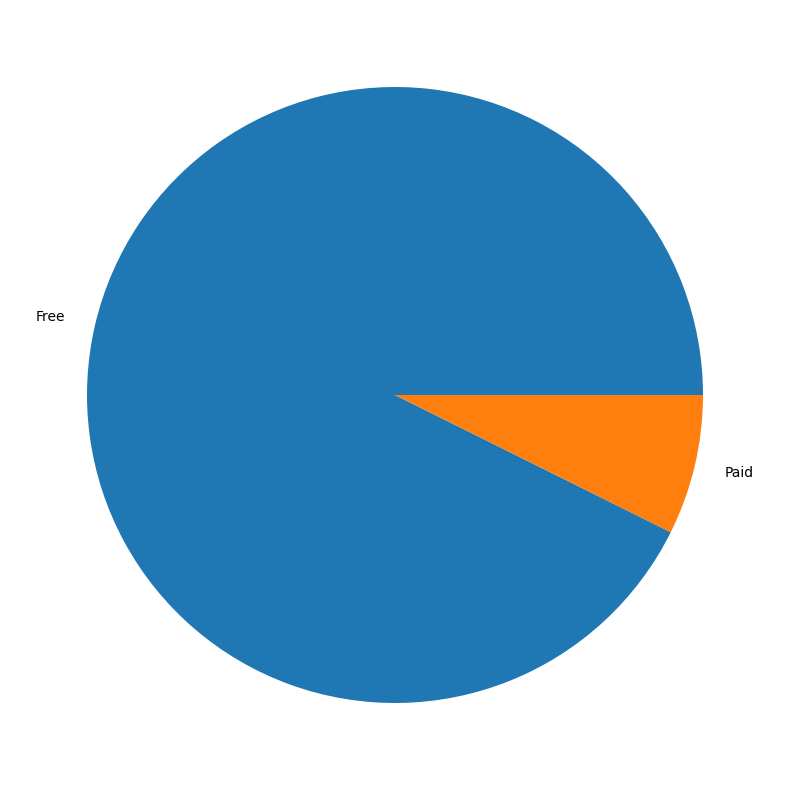

In [76]:
df.value_counts("Type").plot(kind ="pie",figsize = (10,10))

<Axes: xlabel='Type'>

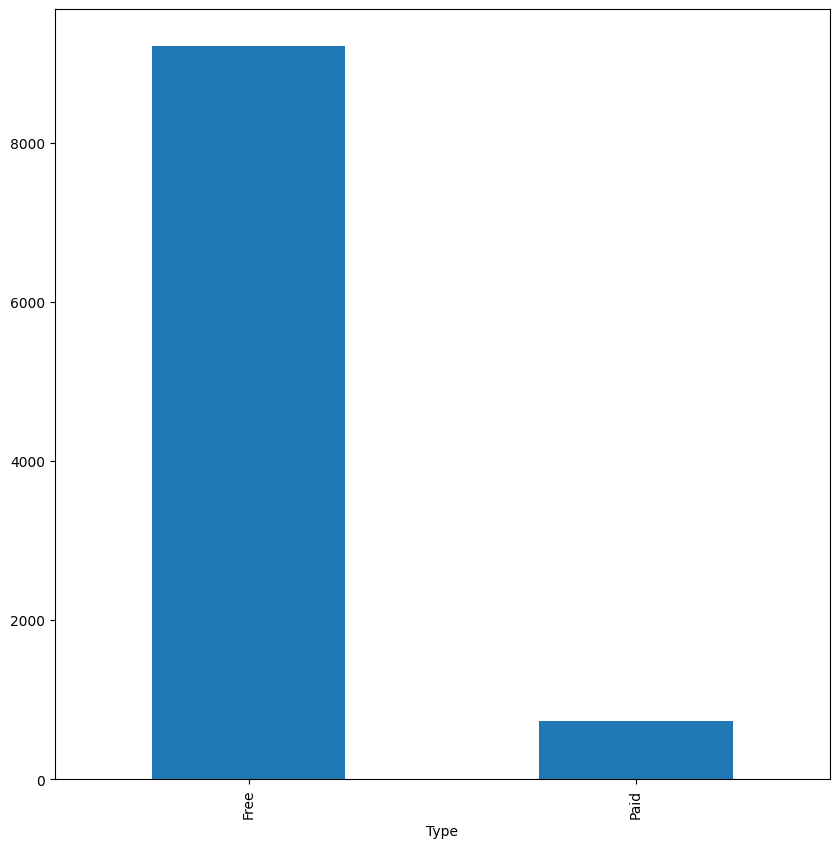

In [77]:
df.value_counts("Type").plot(kind ="bar",figsize = (10,10))

In [78]:
num_df.head()

,Rating,Reviews,Size,Installs,Price,day,month,year
0,4.1,159,19.0,10000,0.0,7,1,2018
1,3.9,967,14.0,500000,0.0,15,1,2018
2,4.7,87510,8.7,5000000,0.0,1,8,2018
3,4.5,215644,25.0,50000000,0.0,8,6,2018
4,4.3,967,2.8,100000,0.0,20,6,2018
